In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

from tqdm import tqdm
import warnings

from statsbombpy import sb

In [102]:
data = pd.read_csv("./data.csv")

In [103]:
data.shape

(9691, 61)

In [104]:
y1 = data["statsbomb_xg"]
y2 = data["is_goal"]
X = data.drop(["statsbomb_xg", "is_goal", "end_location_x", "end_location_y"], axis=1)

In [105]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9691 entries, 0 to 9690
Data columns (total 57 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   period                              9691 non-null   int64  
 1   minute                              9691 non-null   int64  
 2   possession                          9691 non-null   int64  
 3   location_x                          9691 non-null   float64
 4   location_y                          9691 non-null   float64
 5   duration                            9691 non-null   float64
 6   first_time                          9691 non-null   bool   
 7   open_goal                           9691 non-null   bool   
 8   one_on_one                          9691 non-null   bool   
 9   play_pattern_From Corner            9691 non-null   bool   
 10  play_pattern_From Counter           9691 non-null   bool   
 11  play_pattern_From Free Kick         9691 no

In [106]:
def preprocess_continuous(X, y):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

    return X_train, X_test, y_train, y_test

In [107]:
def preprocess_classifier(X, y):
    scaler = StandardScaler().fit(X)
    X = scaler.transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

    X_train, y_train = SMOTE().fit_resample(X_train, y_train)

    return X_train, X_test, y_train, y_test

In [108]:
def calculate_errors(results_test, results_pred, name):
    mae = mean_absolute_error(results_test, results_pred)
    rmse = root_mean_squared_error(results_test, results_pred)
    r2 = r2_score(results_test, results_pred)
    print(f"\n{name}")
    print("Mean Absolute Error:", mae)
    print("Root Mean Squared Error:", rmse)
    print("R-squared (R2 Score):", r2)

In [109]:
def calculate_stats(results_test, results_pred, name):
    cm = confusion_matrix(results_test, results_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not a goal", "Goal"])
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix ({name})')
    plt.show()

    print(f"\n{name}")
    accuracy = accuracy_score(results_test, results_pred)
    precision = precision_score(results_test, results_pred)
    recall = recall_score(results_test, results_pred)
    f1 = f1_score(results_test, results_pred)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1:", f1)

In [110]:
def linear_regression():
    linear_r = LinearRegression()
    linear_r.fit(X_train, y_train)
    y_pred = linear_r.predict(X_test)

    calculate_errors(y_test, y_pred, "Linear Regression")

In [111]:
def logistic_regression():
    logistic_r = LogisticRegression()
    logistic_r.fit(X_train, y_train)
    y_pred = logistic_r.predict(X_test)

    calculate_stats(y_test, y_pred, "Logistic Regression")

In [112]:
def decision_tree():
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    calculate_stats(y_test, y_pred, "Decision Tree")

In [113]:
X_train, X_test, y_train, y_test = preprocess_continuous(X, y1)
linear_regression()


Linear Regression
Mean Absolute Error: 0.05785746795973605
Root Mean Squared Error: 0.09371285913785182
R-squared (R2 Score): 0.6648150270045108


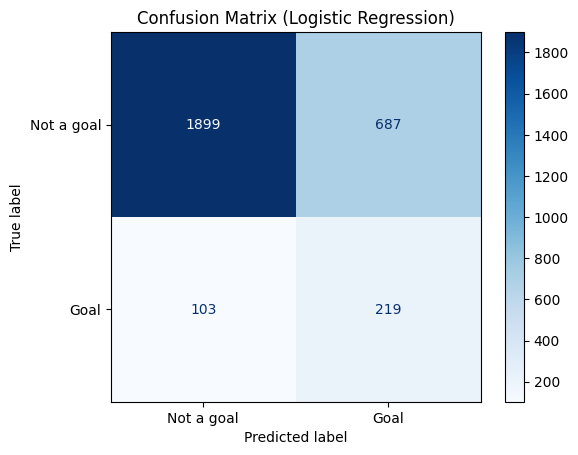


Logistic Regression
Accuracy: 0.7283356258596974
Precision: 0.24172185430463577
Recall: 0.6801242236024845
F1: 0.3566775244299674


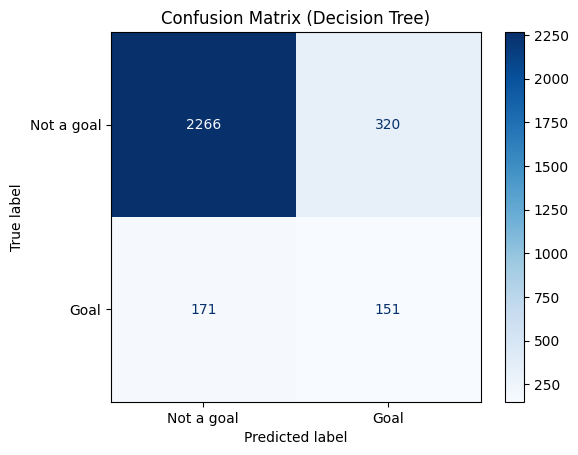


Decision Tree
Accuracy: 0.8311554332874828
Precision: 0.3205944798301486
Recall: 0.468944099378882
F1: 0.38083228247162676


In [114]:
X_train, X_test, y_train, y_test = preprocess_classifier(X, y2)
logistic_regression()
decision_tree()